In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('word_errors.csv')

In [4]:
df = df.sort_values('Count', ascending=False)
df

,Label,Count
21,313EB,67
41,5E84,58
18,522B,49
47,7DA0,48
79,F0832,46
...,...,...
352,5FC3,1
34,516D,1
354,51AC,1
186,6599,1


In [5]:
df.describe()

,Count
count,389.000000
mean,9.508997
std,9.702696
min,1.000000
25%,3.000000
50%,7.000000
75%,12.000000
max,67.000000


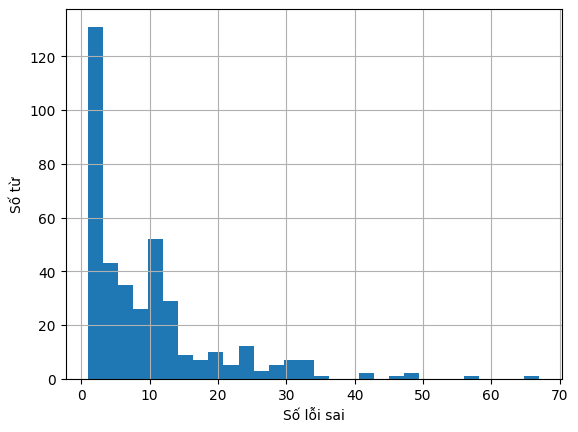

In [6]:
df.Count.plot(kind='hist', bins=30)

plt.xlabel("Số lỗi sai")
plt.ylabel("Số từ")
# plt.title("Phân bố số từ có cùng lỗi sai")

# plt.show()
plt.grid()
plt.savefig("word_error_nom_histogram.png", dpi=300)

In [ ]:
df_all = df.Label.values
df_25 = df[df.Count >= df.Count.quantile(0.25)].Label.values
df_50 = df[df.Count >= df.Count.quantile(0.50)].Label.values
df_75 = df[df.Count >= df.Count.quantile(0.75)].Label.values
df_mean = df[df.Count >= df.Count.mean()].Label.values

In [ ]:
with open('NOM_CGGAN_train.txt') as f:
    lines = f.read().splitlines()
len(lines)

In [ ]:
data_all = [line for line in lines if line.split('\t')[1] in df_all]
data_25 = [line for line in lines if line.split('\t')[1] in df_25]
data_50 = [line for line in lines if line.split('\t')[1] in df_50]
data_mean = [line for line in lines if line.split('\t')[1] in df_mean]
data_75 = [line for line in lines if line.split('\t')[1] in df_75]

In [ ]:
with open('NOM_CGGAN_errors_all.txt', 'w') as f:
    f.write('\n'.join(data_all).rstrip())

In [ ]:
with open('NOM_CGGAN_errors_Q1.txt', 'w') as f:
    f.write('\n'.join(data_25).rstrip())

In [ ]:
with open('NOM_CGGAN_errors_Q2.txt', 'w') as f:
    f.write('\n'.join(data_50).rstrip())

In [ ]:
with open('NOM_CGGAN_errors_mean.txt', 'w') as f:
    f.write('\n'.join(data_mean).rstrip())

In [ ]:
with open('NOM_CGGAN_errors_Q3.txt', 'w') as f:
    f.write('\n'.join(data_75).rstrip())

In [ ]:
import wandb
import os
import pickle
from tqdm import tqdm

os.environ['WANDB_API_KEY'] = '41b0abfcc690d5e88d908912bdd809e22b294be0'

In [ ]:
with open('NOM_CGGAN_train_26_45.pkl', 'rb') as file:
    histories = pickle.load(file)

for history in tqdm(histories):
    wandb.init(project="NomOCR_TPU", name="NEW | VGG16 | CGGAN | ALL")
    acc = history['sparse_categorical_accuracy']
    val_acc = history['val_sparse_categorical_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    
    for i in range(len(acc)):
        wandb.log({
            'sparse_categorical_accuracy': acc[i],
            'val_sparse_categorical_accuracy': val_acc[i],
            'loss': loss[i],
            'val_loss': val_loss[i],
        })
    wandb.log({'best_val_sparse_categorical_accuracy': max(val_acc)})
    wandb.finish()